In [35]:
from keras.preprocessing import sequence
from keras.layers.core import Dense, Dropout, Flatten,Activation
from keras.layers import MaxPooling1D, Flatten
from keras.layers import Embedding, LSTM, Conv1D, GlobalMaxPooling1D
x_train = sequence.pad_sequences(x_train, maxlen=200)
x_val = sequence.pad_sequences(x_val, maxlen=200)
x_test = sequence.pad_sequences(x_test, maxlen=200)

In [30]:
# MLP
model = Sequential()
model.add(Embedding(20000, 128, input_length=200))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [31]:
# LSTM
model2 = Sequential()
model2.add(Embedding(20000, 128))
model2.add(LSTM(128))
model2.add(Dense(1, activation='sigmoid'))

In [32]:
# CNN
model3 = Sequential()
model3.add(Embedding(20000, 128, input_length=200))
model3.add(Dropout(0.2))
model3.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model3.add(GlobalMaxPooling1D())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(1, activation='sigmoid'))

In [33]:
# 순환 컨볼루션 신경망 모델
model4 = Sequential()
model4.add(Embedding(20000, 128, input_length=200))
model4.add(Dropout(0.2))
model4.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model4.add(MaxPooling1D(pool_size=4))
model4.add(LSTM(128))
model4.add(Dense(1, activation='sigmoid'))

In [36]:
from keras.datasets import imdb


In [37]:
max_features = 20000
text_max_words = 200

In [38]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)


In [39]:
# 훈련셋과 검증셋 분리
x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

In [40]:
# 데이터셋 전처리 : 문장 길이 맞추기
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)


In [47]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
hist = model2.fit(x_train, y_train, epochs=2, batch_size=64, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 200s 10ms/step - loss: 0.4653 - acc: 0.7736 - val_loss: 0.3634 - val_acc: 0.8452
Epoch 2/2
20000/20000 [==============================] - 199s 10ms/step - loss: 0.2279 - acc: 0.9109 - val_loss: 0.3225 - val_acc: 0.8618


In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

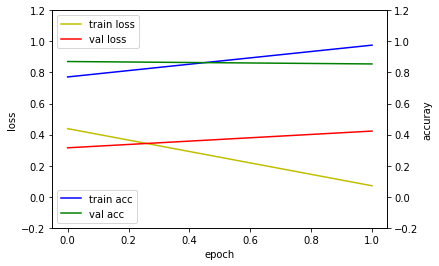

In [44]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [45]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

25000/25000 [==============================] - 10s 387us/step
## evaluation loss and_metrics ##
[0.4403386447238922, 0.8430400000190735]
